<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/1_LeaveOneOut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

- https://www.youtube.com/watch?v=yxqcHWQKkdA ---> Leave One Out Cross Validation in Machine Learning | LOOCV

-----------------------

- Provides **train/test** indices to split data in train/test sets. Each sample is used **once as a test set** while the **remaining samples** form the **training set.**

- Due to the **high number of test sets** (which is the same as the number of samples) this cross-validation method can be **very costly**.

- For **large datasets** one should favor **KFold, ShuffleSplit or StratifiedKFold.**

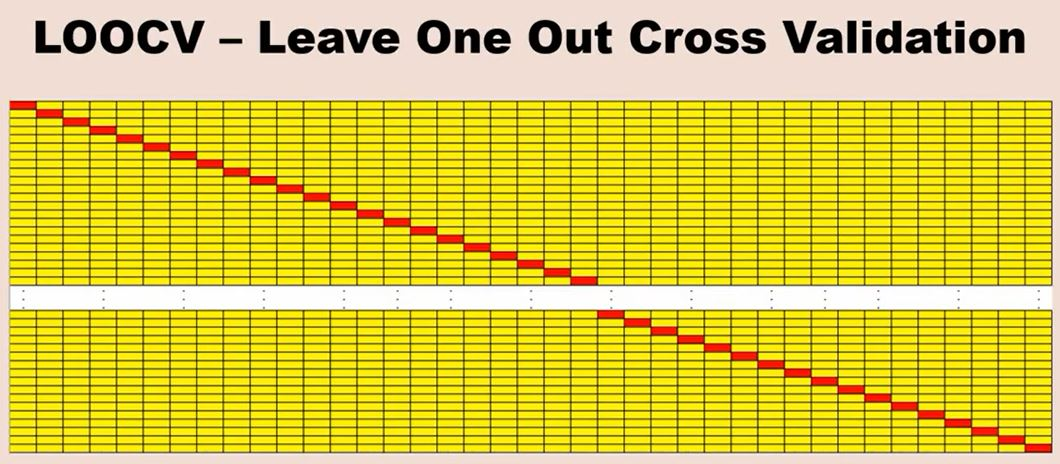

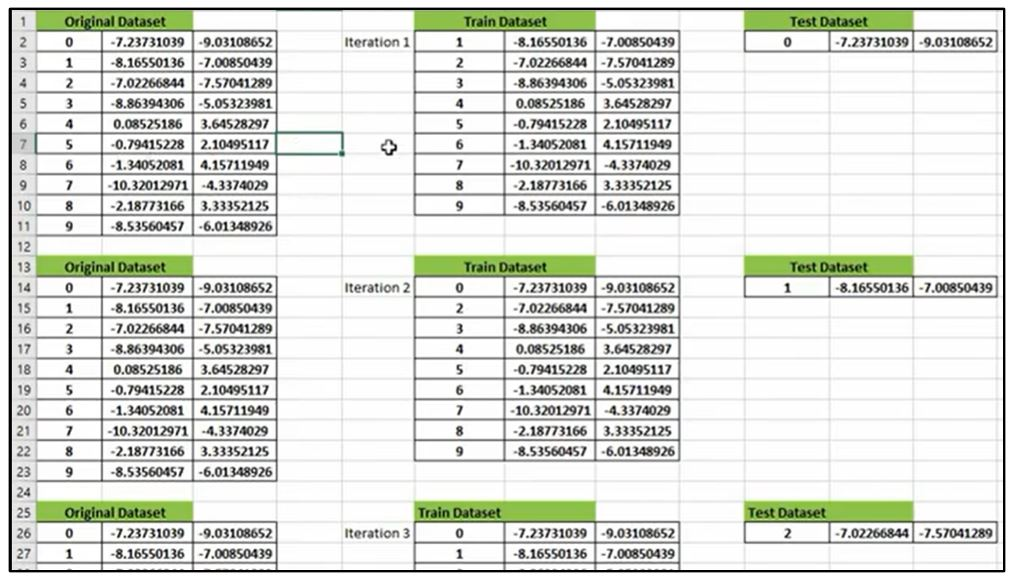

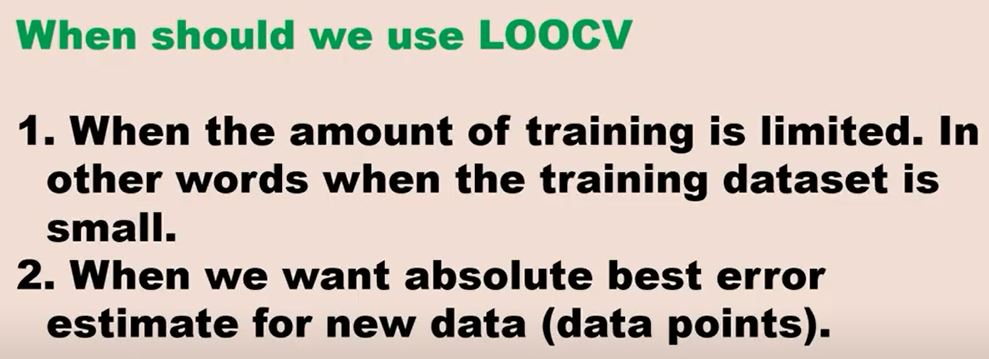

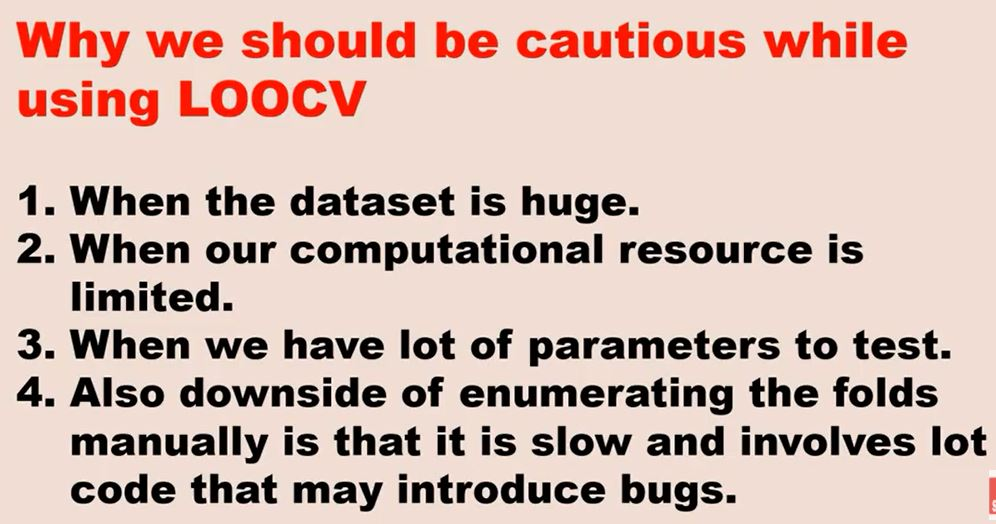

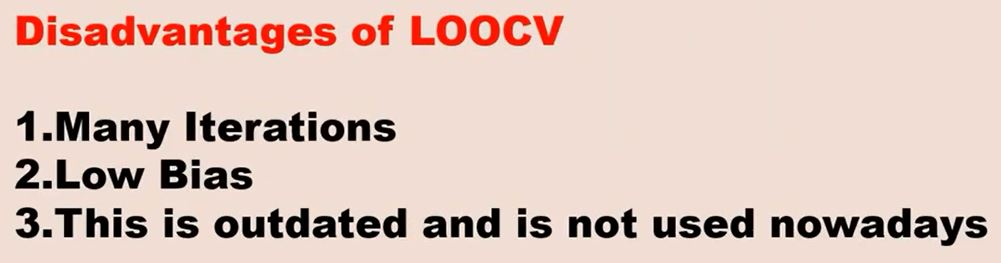

-----------------------

In [1]:
import numpy as np

from sklearn.model_selection import LeaveOneOut

X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])

loo = LeaveOneOut()
loo.get_n_splits(X)

2

In [2]:
print(loo)

LeaveOneOut()


In [3]:
for train_index, test_index in loo.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  print(X_train, X_test, y_train, y_test)

TRAIN: [1] TEST: [0]
[[3 4]] [[1 2]] [2] [1]
TRAIN: [0] TEST: [1]
[[1 2]] [[3 4]] [1] [2]


---------------------

In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X, y = make_blobs(n_samples=10, random_state=1)

In [2]:
cv = LeaveOneOut()

In [3]:
y

array([2, 2, 2, 1, 0, 0, 0, 1, 0, 1])

In [4]:
for i,j in cv.split(X):
  print(i,j)

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


In [5]:
y_true, y_pred = [], []

for i,j in cv.split(X):
  print(i,j)
  X_train, X_test = X[i,:], X[j,:]
  print(X_train)
  print(X_test)
  y_train, y_test = y[i], y[j]
  model = RandomForestClassifier(random_state=1)
  model.fit(X_train, y_train)
  yhat = model.predict(X_test)
  y_true.append(y_test[0])
  y_pred.append(yhat[0])

[1 2 3 4 5 6 7 8 9] [0]
[[ -8.16550136  -7.00850439]
 [ -7.02266844  -7.57041289]
 [ -8.86394306  -5.05323981]
 [  0.08525186   3.64528297]
 [ -0.79415228   2.10495117]
 [ -1.34052081   4.15711949]
 [-10.32012971  -4.3374029 ]
 [ -2.18773166   3.33352125]
 [ -8.53560457  -6.01348926]]
[[-7.23731039 -9.03108652]]
[0 2 3 4 5 6 7 8 9] [1]
[[ -7.23731039  -9.03108652]
 [ -7.02266844  -7.57041289]
 [ -8.86394306  -5.05323981]
 [  0.08525186   3.64528297]
 [ -0.79415228   2.10495117]
 [ -1.34052081   4.15711949]
 [-10.32012971  -4.3374029 ]
 [ -2.18773166   3.33352125]
 [ -8.53560457  -6.01348926]]
[[-8.16550136 -7.00850439]]
[0 1 3 4 5 6 7 8 9] [2]
[[ -7.23731039  -9.03108652]
 [ -8.16550136  -7.00850439]
 [ -8.86394306  -5.05323981]
 [  0.08525186   3.64528297]
 [ -0.79415228   2.10495117]
 [ -1.34052081   4.15711949]
 [-10.32012971  -4.3374029 ]
 [ -2.18773166   3.33352125]
 [ -8.53560457  -6.01348926]]
[[-7.02266844 -7.57041289]]
[0 1 2 4 5 6 7 8 9] [3]
[[ -7.23731039  -9.03108652]
 [ -8

In [6]:
accuracy = accuracy_score(y_true, y_pred)
accuracy

0.9

In [7]:
from sklearn.model_selection import cross_val_score

model1 = RandomForestClassifier(random_state=1)

scores = cross_val_score(model1, X, y, scoring='accuracy', cv=cv)
scores.mean()

0.9